# CNN Improving( Cat and Dog )

In [1]:
from keras.preprocessing.image import (
    ImageDataGenerator, img_to_array, array_to_img, load_img
)

Using TensorFlow backend.


In [2]:
# 기본 이미지 경로 지정
image_path = './PetImages/'

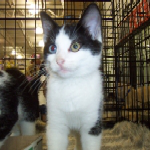

In [3]:
# 이미지 파일 로드 테스트
def load_one_image():
    global cat
    global dog
    cat = load_img(image_path + 'train/Cat/1000.jpg')
    dog = load_img( image_path + 'train/Dog/1000.jpg')

load_one_image()
cat
# dog


In [4]:
# 이미지 to Array 테스트
def convert_img_to_array():
    global cat_array
    global dog_array
    cat_array = img_to_array(cat)
    dog_array = img_to_array(dog)

convert_img_to_array()
cat_array[:1]
# dog_array[:1]


array([[[ 131.,  108.,   76.],
        [ 135.,  108.,   78.],
        [ 143.,  112.,   81.],
        [ 147.,  119.,   79.],
        [ 146.,  123.,   79.],
        [  99.,   77.,   40.],
        [  92.,   66.,   41.],
        [  97.,   71.,   48.],
        [ 122.,   96.,   61.],
        [ 159.,  136.,   84.],
        [ 157.,  132.,   76.],
        [ 159.,  131.,   81.],
        [ 182.,  150.,  109.],
        [ 216.,  187.,  147.],
        [ 197.,  170.,  125.],
        [ 133.,  107.,   58.],
        [ 167.,  137.,  103.],
        [ 219.,  189.,  155.],
        [ 227.,  198.,  158.],
        [ 230.,  207.,  157.],
        [ 234.,  214.,  164.],
        [ 240.,  218.,  179.],
        [ 248.,  225.,  191.],
        [ 253.,  231.,  190.],
        [ 255.,  236.,  193.],
        [ 154.,  136.,  114.],
        [  98.,   77.,   84.],
        [ 255.,  240.,  251.],
        [ 255.,  242.,  226.],
        [ 255.,  243.,  199.],
        [ 255.,  241.,  198.],
        [ 253.,  234.,  204.],
        

In [ ]:
import os

In [8]:
# 부족한 Cat 학습이미지를 추가로 생성(Dog 학습데이터와 동일하게 9000개로 맞춤)
def make_cat_train_image():
    aug_gen = ImageDataGenerator(
        zoom_range=20,
        brightness_range=[1,2],
        rotation_range=30, 
        width_shift_range=0.1, 
        height_shift_range=0.1,
        shear_range=20
    )
    
    save_path = image_path + 'NewCat'
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    cat_gen = aug_gen.flow_from_directory(
        image_path + 'train_old/', batch_size=1000, 
        save_prefix='cat', 
        save_to_dir=save_path,
        save_format='jpeg'
    )
    for idx, _ in enumerate(cat_gen):
        if idx == 8:
            break
        print(
            '{}\'th generate(count) : {}'.format(
            idx+1, len(os.listdir(save_path)))
        )
        
make_cat_train_image()         

Found 1000 images belonging to 1 classes.
1'th generate(count) : 1000
2'th generate(count) : 2000
3'th generate(count) : 3000
4'th generate(count) : 4000
5'th generate(count) : 5000
6'th generate(count) : 6000
7'th generate(count) : 7000
8'th generate(count) : 8000


In [9]:
from keras.models import Sequential
from keras.layers import (Conv2D, MaxPool2D, Dense, Flatten, Dropout)

In [11]:
# 특정 경로로 부터 학습/검증용 이미지 데이터 생성객체( ImageDataGenerator ) 정의
def set_image_generator():
    global train_gen
    global valid_gen
    
    img_gen = ImageDataGenerator()
    train_gen = img_gen.flow_from_directory(
        image_path + 'train', target_size=(32,32), class_mode='binary', batch_size=1000
    )
    valid_gen = img_gen.flow_from_directory(
        image_path + 'train', target_size=(32,32), class_mode='binary', batch_size=1000
    )

In [ ]:
# CNN 모델정의(Basic Model + Dropout + Complex Conv2D/MaxPool2D/Hidden Layer)
def make_and_compile_model():
    global model
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    model.compile(
        optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy']
    )

In [ ]:
# CNN 모델 학습( ImageDataGenerator를 사용 )
def learn():
    model.fit_generator(
        train_gen, epochs=10, validation_data=valid_gen
    )

In [12]:
if __name__ == '__main__':
#     make_cat_train_image()
    set_image_generator()
    make_and_compile_model()
    learn()

Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
________________________________________________________